## A Tour of Dimensionality Reduction
______________________________________

### Introduction

We as human beings are inherently contrained by three spacial dimensions. This poses a problem because almost all data of real interest contains many more dimensions (in features) than we could easily comprehend or display. Genomics data might have, for instance, tens or hundreds of thousands of independent factors to consider. Thankfully, **dimensionality reduction** techniques allow us to distill key factors from the original data. Dimension reduction helps us efficiently represent data and understand it better. 

In this notebook, we will explore the MNIST handwritten digits data set, very commonly used for computer vision research. This is a set of grayscale 28x28 pixel images. Each pixel value is represented by a number, 0 being completely dark and 1 being completely bright. Unraveling the 28x28 matrix into a vector of 784 numerical values gives us a naive but common method to represent each digit.

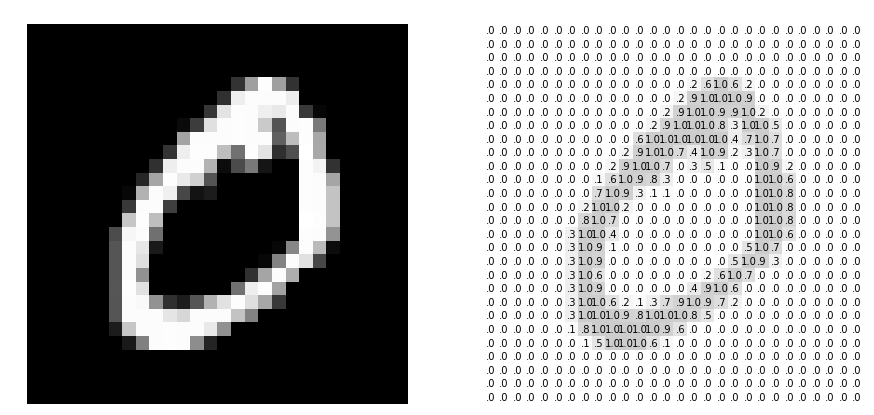

In [373]:
fig, ax = plt.subplots(1, 2, figsize = (15, 15))

ax[0].matshow(mnist_digit[1].reshape((28,28)), cmap='gray', clim=(0,1))
ax[0].axis('off')

ax[1].matshow(1 - (mnist_digit[1] / 5).reshape((28,28)), cmap='gray', clim=(0,1))
ax[1].axis('off')

c = 0
for i in range(28):
    for j in range(28):
        ax[1].text(j, i, '{:.1f}'.format(mnist_digit[1][c]).lstrip('0'), ha='center', va='center')
        c += 1
    
pass

Our feature space is now a 784-dimensional cube with each axis corresponding to a given pixel intensity. Each instance of a digit is a point in this space. For example, the point at the origin represents the image of all black pixels. If we plotted all the points in the MNIST data set like this, how do we expect the points to be distributed?

Intuition should tell us that the digits are sparsely distributed  - a typical point in this space would look more like white noise than a recognizible image. We also expect many of the pixels to be non-informative. Almost all pixels on the edges are dark (because MNIST digits are centered and scaled). Although each image is embedded in a 784-dimensional space, the MNIST images are inherently lower dimensional. 

### Principal Components Analysis

We expect that similar images group together in feature-space. We might expect a group of points corresponding to the zero's and another for ones's. To confirm our suspicions, we would need a way to project the higher dimensional data to a lower dimensional set. One way is to imagine rotating the 784-dimensional cube and projecting the points down to a plane as if we were shining a light and observing the resulting shadows. Trying to imagine that many dimensions is intractable so let's consider a much simpler case.

Suppose we have a three dimensional cloud of points within a unit cube. Some points are colored blue and some orange. We can choose any angle to view the data. We might choose to look through one face or another, but there is no reason that this should provide the best vantage. Instead, we want to choose an angle such that the resulting projection perserves the most global structure of the data. Finding such an optimal rotation in the idea behind **Principal Components Analysis (PCA)**. 

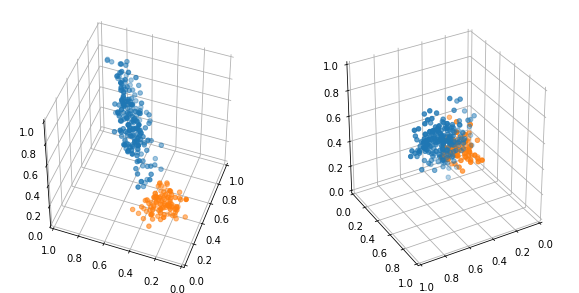

In [369]:
np.random.seed(0)
npoints = 200
from mpl_toolkits.mplot3d import Axes3D

# sample points from multivariate gaussian
mu_a = [0.6, 0.6, 0.6]
cov_a = [[0.02, 0.01, 0.01], [0.01, 0.01, 0.01], [0.01, 0.01, 0.02]]

mu_b = [0.25, 0.25, 0.25]
cov_b = [[0.005, 0, 0], [0, 0.005, 0], [0, 0, 0.005]]

samp_a = np.random.multivariate_normal(mu_a, cov_a, npoints)
samp_b = np.random.multivariate_normal(mu_b, cov_b, npoints // 2)

# plot points on 3D axis
angles = [[45, 200], [30, 60]]
fig = plt.figure(figsize=(10, 5))
for i in range(2):
    ax = fig.add_subplot(1, 2, i+1, projection='3d')
    ax.scatter(samp_a[:,0], samp_a[:,1], samp_a[:,2])
    ax.scatter(samp_b[:,0], samp_b[:,1], samp_b[:,2])
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_zlim([0,1])

    ax.view_init(angles[i][0], angles[i][1])
    ax.w_xaxis.set_pane_color((1, 1, 1, 1))
    ax.w_yaxis.set_pane_color((1, 1, 1, 1))
    ax.w_zaxis.set_pane_color((1, 1, 1, 1))
pass

In the above example, rotation 1 is better than rotation 2 because the points apprear to be more spread out. In other words, we wish to find a rotation (a linear transformation) that maximizes the variance of the projected data. PCA finds the optimal orthogonal basis such that the most varience falls on the first basis or principal component, the next largest amount on the second, and so forth. Because sucessive principal components are less important and principal components are necessarily independent, we can reduce dimensions by selecting the first $k$ components and discarding the rest. In a sense we have created new features from linear combinations of our previous ones which keeps the most variation possible. 

Below is our data set plotted using only the first two principal components. We can better see the seperation between the blue and orange points. 

In [398]:
X = np.vstack((samp_a, samp_b))
X = (X - np.mean(X, axis=0))
U, S, V = np.linalg.svd(X)

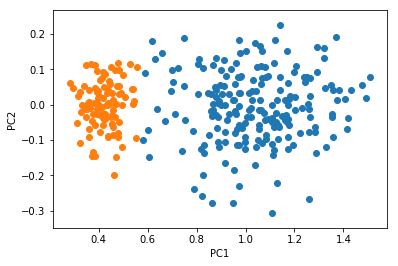

In [399]:
a_trans = samp_a @ V[0:2].T
b_trans = samp_b @ V[0:2].T
plt.scatter(a_trans[:,0], a_trans[:,1])
plt.scatter(b_trans[:,0], b_trans[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
pass

PCA works by the eigen decomposition of the covarience matrix of the data. If we have data $X$ with variables listed column-wise and each variable centered with mean 0, then the covarience matrix is given by $\Sigma = X^TX$.

### References
_______________________________

In [41]:
from IPython.display import HTML

In [42]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')